In [13]:
import pandas as pd
# read the dataset
diabetes_df = pd.read_csv("../datasets/supervised_learning_python/diabetes_clean.csv")
print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [14]:
# drop the glucose column and convert the remaining columns to a numpy array    
X = diabetes_df.drop("glucose", axis=1).values
# convert the glucose column to a numpy array
y = diabetes_df["glucose"].values

# print first 5 rows of X and y
print(X[:5])
print(y[:5])

# show the type of X and y
print(type(X), type(y))

[[6.000e+00 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01 5.000e+01
  1.000e+00]
 [1.000e+00 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01 3.100e+01
  0.000e+00]
 [8.000e+00 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01 3.200e+01
  1.000e+00]
 [1.000e+00 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01 2.100e+01
  0.000e+00]
 [0.000e+00 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00 3.300e+01
  1.000e+00]]
[148  85 183  89 137]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [15]:
# Making predictions from a single feature
# we are using the bmi column to predict the glucose level
# we need to reshape the bmi column to a 2D array
X_bmi = diabetes_df["bmi"].values.reshape(-1, 1)
print(X_bmi[:5])

[[33.6]
 [26.6]
 [23.3]
 [28.1]
 [43.1]]


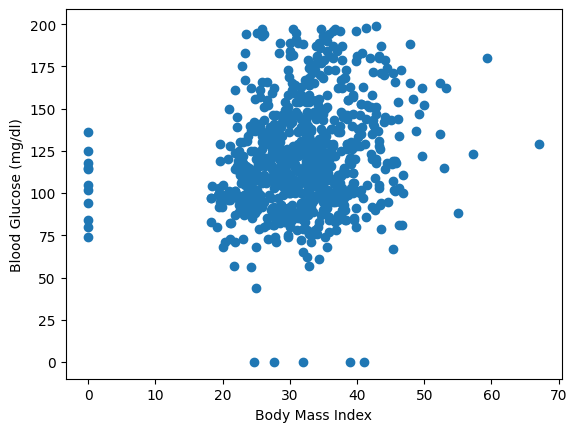

In [16]:
import matplotlib.pyplot as plt

# plot the bmi vs glucose
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

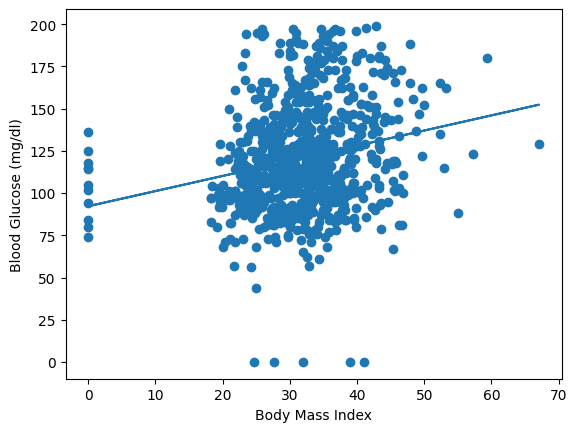

In [17]:
# train a linear regression model   
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)   
# make predictions
predictions = reg.predict(X_bmi)
# plot the predictions  
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()                      

In [18]:
# Linear regression using all features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
# print the predictions
print(y_pred[:5])
# print the actual values
print(y_test[:5])

[119.91303675  95.70325357 104.63962314 114.05040231 118.58321727]
[ 98 112 108 107 136]


R-squared
R : quantifies the variance in target values
explained by the features （range:0-1）


In [19]:
# calculate the R-squared score 
reg_all.score(X_test, y_test)

0.2828046881037517

In [20]:
# Root Mean Square Error (RMSE) 
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
print(rmse)

26.341459582232254


In [21]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

693.8724929223755


In [22]:
#   Cross-validation in scikit-learn
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
# define the cross-validation strategy      
# 6 folds, shuffle the data, random state 42
kf = KFold(n_splits=6, shuffle=True, random_state=42) 
# define the model
reg = LinearRegression()
# perform cross-validation
# cv_results is an array of R-squared scores
cv_results = cross_val_score(reg, X, y, cv=kf)
print("cv_results: ", cv_results)
# print the mean and standard deviation of the R-squared scores
print("mean and std value of cv_results: ", np.mean(cv_results), np.std(cv_results))
# print the quantile values
print("quantile values of cv_results: ", np.quantile(cv_results, [0.05, 0.95]))


cv_results:  [0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]
mean and std value of cv_results:  0.3190969786734479 0.07015320610114203
quantile values of cv_results:  [0.243913   0.41526742]


In [23]:
# Ridge regression in scikit-learn
from sklearn.linear_model import Ridge
scores = [] 
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train) 
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print("ridge regression scores: ", scores)


ridge regression scores:  [0.2828466623222221, 0.28320633574804754, 0.2853000732200006, 0.26423984812668133, 0.1929242469410093]


In [24]:
# Lasso regression in scikit-learn
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print("lasso regression scores: ", scores)

lasso regression scores:  [0.2831114455475573, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617965]
